In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
np.random.seed(101)
n_rows = 1000

# 1. GENERATE DATA DASAR
data = {
    'Customer_ID': range(1001, 1001 + n_rows),
    'Year_Birth': np.random.randint(1950, 2010, n_rows), # Tahun Lahir
    'Education': np.random.choice(['S1', 'S2', 'SMA', 'PhD', 'Master', '2n Cycle', 'Basic'], n_rows), # Perlu distandarisasi
    'Marital_Status': np.random.choice(['Married', 'Single', 'Together', 'Divorced', 'YOLO', 'Absurd'], n_rows), # Ada status aneh
    'Income': np.random.normal(5000000, 2000000, n_rows), # Gaji (Distribusi Normal)
    'Kidhome': np.random.randint(0, 3, n_rows), # Jumlah anak kecil
    'Teenhome': np.random.randint(0, 3, n_rows), # Jumlah anak remaja
    'Dt_Customer': pd.date_range(start='2018-01-01', periods=n_rows, freq='D'), # Tanggal gabung
    'Recency': np.random.randint(0, 100, n_rows), # Jumlah hari sejak belanja terakhir
    'MntWines': np.random.randint(0, 1000000, n_rows), # Belanja Anggur
    'MntFruits': np.random.randint(0, 500000, n_rows), # Belanja Buah
    'MntMeat': np.random.randint(0, 1000000, n_rows), # Belanja Daging
    'NumWebVisitsMonth': np.random.randint(0, 20, n_rows), # Kunjungan Web
    'Complain': np.random.choice([0, 1], n_rows, p=[0.95, 0.05]) # 1 = Pernah komplain
}

df_raw = pd.DataFrame(data)

# 2. MENGOTORI DATA (Misi Pembersihan Kamu Dimulai Di Sini)

# Missing Values
df_raw.loc[10:30, 'Income'] = np.nan 

# Noise / Outlier Ekstrim
df_raw.loc[5, 'Income'] = 666666000000 # Gaji 600 Milyar (Error input)
df_raw.loc[900, 'Year_Birth'] = 1890 # Lahir jaman penjajahan (Mustahil hidup)

# Data String Kotor
df_raw['Education'] = df_raw['Education'].replace({'Master': 'S2', '2n Cycle': 'S2'}) # Ini clue buat cleaning nanti

print("Data Mentah MegaMart Siap Diolah!")
print(df_raw.info())
display(df_raw.head())

/home/ahmad/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Data Mentah MegaMart Siap Diolah!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        1000 non-null   int64         
 1   Year_Birth         1000 non-null   int64         
 2   Education          1000 non-null   object        
 3   Marital_Status     1000 non-null   object        
 4   Income             979 non-null    float64       
 5   Kidhome            1000 non-null   int64         
 6   Teenhome           1000 non-null   int64         
 7   Dt_Customer        1000 non-null   datetime64[ns]
 8   Recency            1000 non-null   int64         
 9   MntWines           1000 non-null   int64         
 10  MntFruits          1000 non-null   int64         
 11  MntMeat            1000 non-null   int64         
 12  NumWebVisitsMonth  1000 non-null   int64         
 13  Complain           1000 non-nu

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain
0,1001,1981,S2,Together,4.073491e+06,2,2,2018-01-01,83,581797,220417,208126,18,0
1,1002,1961,Basic,Married,3.984576e+06,2,1,2018-01-02,31,938485,279208,235601,14,0
2,1003,1967,Basic,Absurd,6.221782e+06,0,0,2018-01-03,86,924449,204888,928829,15,0
3,1004,1956,S1,YOLO,4.812797e+06,0,0,2018-01-04,91,29469,332981,517299,2,0
4,1005,1973,S1,Single,4.570514e+06,0,1,2018-01-05,39,284136,92703,484543,11,0


In [2]:
df_raw

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain
0,1001,1981,S2,Together,4.073491e+06,2,2,2018-01-01,83,581797,220417,208126,18,0
1,1002,1961,Basic,Married,3.984576e+06,2,1,2018-01-02,31,938485,279208,235601,14,0
2,1003,1967,Basic,Absurd,6.221782e+06,0,0,2018-01-03,86,924449,204888,928829,15,0
3,1004,1956,S1,YOLO,4.812797e+06,0,0,2018-01-04,91,29469,332981,517299,2,0
4,1005,1973,S1,Single,4.570514e+06,0,1,2018-01-05,39,284136,92703,484543,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,1957,S2,Absurd,6.140640e+06,0,1,2020-09-22,33,776004,130444,700403,6,0
996,1997,1973,SMA,YOLO,4.164390e+06,1,2,2020-09-23,34,809965,160730,951474,18,1
997,1998,1976,Basic,Divorced,6.870126e+06,0,0,2020-09-24,20,290205,251149,57830,9,0
998,1999,1964,PhD,Absurd,4.792701e+06,0,1,2020-09-25,5,649688,26257,620497,18,0


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        1000 non-null   int64         
 1   Year_Birth         1000 non-null   int64         
 2   Education          1000 non-null   object        
 3   Marital_Status     1000 non-null   object        
 4   Income             979 non-null    float64       
 5   Kidhome            1000 non-null   int64         
 6   Teenhome           1000 non-null   int64         
 7   Dt_Customer        1000 non-null   datetime64[ns]
 8   Recency            1000 non-null   int64         
 9   MntWines           1000 non-null   int64         
 10  MntFruits          1000 non-null   int64         
 11  MntMeat            1000 non-null   int64         
 12  NumWebVisitsMonth  1000 non-null   int64         
 13  Complain           1000 non-null   int64         
dtypes: dateti

In [4]:
df_raw.describe()

,Customer_ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain
count,1000.000000,1000.000000,9.790000e+02,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1500.500000,1979.625000,6.860461e+08,1.040000,1.007000,2019-05-15 12:00:00,49.650000,506406.462000,245809.603000,494537.974000,9.514000,0.04600
min,1001.000000,1890.000000,-1.516974e+06,0.000000,0.000000,2018-01-01 00:00:00,0.000000,50.000000,307.000000,694.000000,0.000000,0.00000
25%,1250.750000,1965.000000,3.735399e+06,0.000000,0.000000,2018-09-07 18:00:00,27.000000,255904.250000,128794.500000,247022.000000,5.000000,0.00000
50%,1500.500000,1979.000000,5.035127e+06,1.000000,1.000000,2019-05-15 12:00:00,50.000000,502017.500000,239316.500000,493178.500000,9.000000,0.00000
75%,1750.250000,1995.000000,6.414565e+06,2.000000,2.000000,2020-01-20 06:00:00,73.000000,760172.500000,370374.000000,736232.500000,14.000000,0.00000
max,2000.000000,2009.000000,6.666660e+11,2.000000,2.000000,2020-09-26 00:00:00,99.000000,999952.000000,498355.000000,997498.000000,19.000000,1.00000
std,288.819436,17.739703,2.130658e+10,0.811825,0.812164,NaN,27.820631,287184.504073,143367.171155,286828.372264,5.641421,0.20959


In [5]:
df_raw['Income'] = df_raw['Income'].fillna(df_raw['Income'].median())
df_raw

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain
0,1001,1981,S2,Together,4.073491e+06,2,2,2018-01-01,83,581797,220417,208126,18,0
1,1002,1961,Basic,Married,3.984576e+06,2,1,2018-01-02,31,938485,279208,235601,14,0
2,1003,1967,Basic,Absurd,6.221782e+06,0,0,2018-01-03,86,924449,204888,928829,15,0
3,1004,1956,S1,YOLO,4.812797e+06,0,0,2018-01-04,91,29469,332981,517299,2,0
4,1005,1973,S1,Single,4.570514e+06,0,1,2018-01-05,39,284136,92703,484543,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,1957,S2,Absurd,6.140640e+06,0,1,2020-09-22,33,776004,130444,700403,6,0
996,1997,1973,SMA,YOLO,4.164390e+06,1,2,2020-09-23,34,809965,160730,951474,18,1
997,1998,1976,Basic,Divorced,6.870126e+06,0,0,2020-09-24,20,290205,251149,57830,9,0
998,1999,1964,PhD,Absurd,4.792701e+06,0,1,2020-09-25,5,649688,26257,620497,18,0


In [6]:
df_raw.isnull().sum()

Customer_ID          0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeat              0
NumWebVisitsMonth    0
Complain             0
dtype: int64

In [7]:
df_raw.duplicated().sum()

np.int64(0)

In [8]:
df_raw

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain
0,1001,1981,S2,Together,4.073491e+06,2,2,2018-01-01,83,581797,220417,208126,18,0
1,1002,1961,Basic,Married,3.984576e+06,2,1,2018-01-02,31,938485,279208,235601,14,0
2,1003,1967,Basic,Absurd,6.221782e+06,0,0,2018-01-03,86,924449,204888,928829,15,0
3,1004,1956,S1,YOLO,4.812797e+06,0,0,2018-01-04,91,29469,332981,517299,2,0
4,1005,1973,S1,Single,4.570514e+06,0,1,2018-01-05,39,284136,92703,484543,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,1957,S2,Absurd,6.140640e+06,0,1,2020-09-22,33,776004,130444,700403,6,0
996,1997,1973,SMA,YOLO,4.164390e+06,1,2,2020-09-23,34,809965,160730,951474,18,1
997,1998,1976,Basic,Divorced,6.870126e+06,0,0,2020-09-24,20,290205,251149,57830,9,0
998,1999,1964,PhD,Absurd,4.792701e+06,0,1,2020-09-25,5,649688,26257,620497,18,0


In [9]:
numerical = df_raw.select_dtypes('number').columns
numerical

Index(['Customer_ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeat', 'NumWebVisitsMonth', 'Complain'],
      dtype='object')

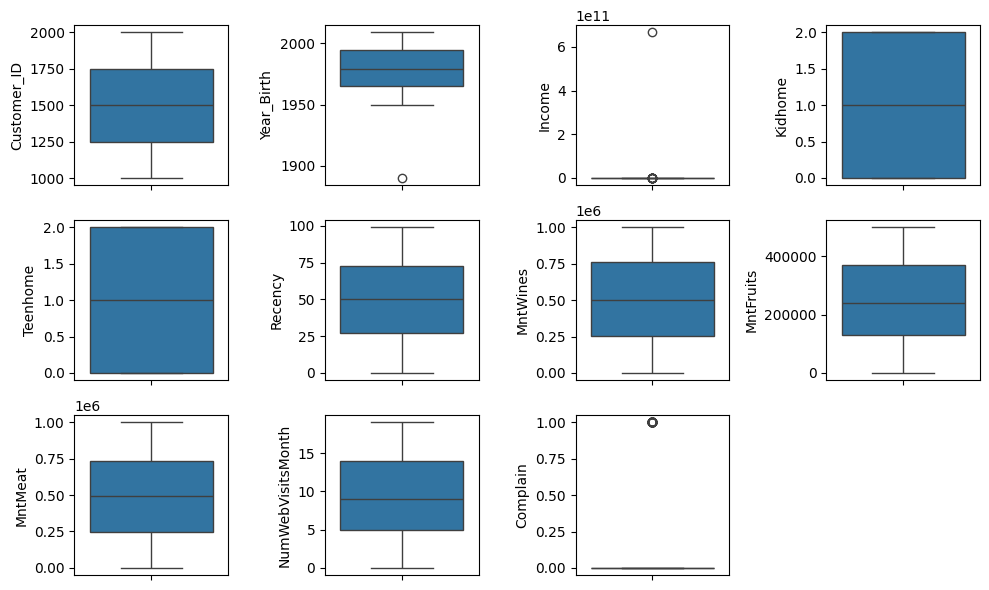

In [10]:


plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(df_raw[column])
plt.tight_layout()
plt.show()


In [11]:
df_raw['Income'].values

array([ 4.07349110e+06,  3.98457643e+06,  6.22178230e+06,  4.81279705e+06,
        4.57051429e+06,  6.66666000e+11,  5.95528380e+06,  5.83008836e+06,
        2.15306307e+06,  6.00437357e+06,  5.03512695e+06,  5.03512695e+06,
        5.03512695e+06,  5.03512695e+06,  5.03512695e+06,  5.03512695e+06,
        5.03512695e+06,  5.03512695e+06,  5.03512695e+06,  5.03512695e+06,
        5.03512695e+06,  5.03512695e+06,  5.03512695e+06,  5.03512695e+06,
        5.03512695e+06,  5.03512695e+06,  5.03512695e+06,  5.03512695e+06,
        5.03512695e+06,  5.03512695e+06,  5.03512695e+06,  4.64709903e+06,
        4.44165041e+06,  3.74123898e+06,  4.69458973e+06,  6.12936037e+06,
        8.55947090e+06,  4.10453000e+06,  9.19488911e+06,  5.07318598e+06,
        3.37613937e+06,  4.09712714e+06,  5.77159239e+06,  4.59563858e+06,
        5.40753282e+06,  6.53913868e+06,  3.51487652e+06,  5.94586518e+06,
        5.87657194e+06,  3.68194751e+06,  6.09248754e+06,  4.44695471e+06,
        4.88494353e+06,  

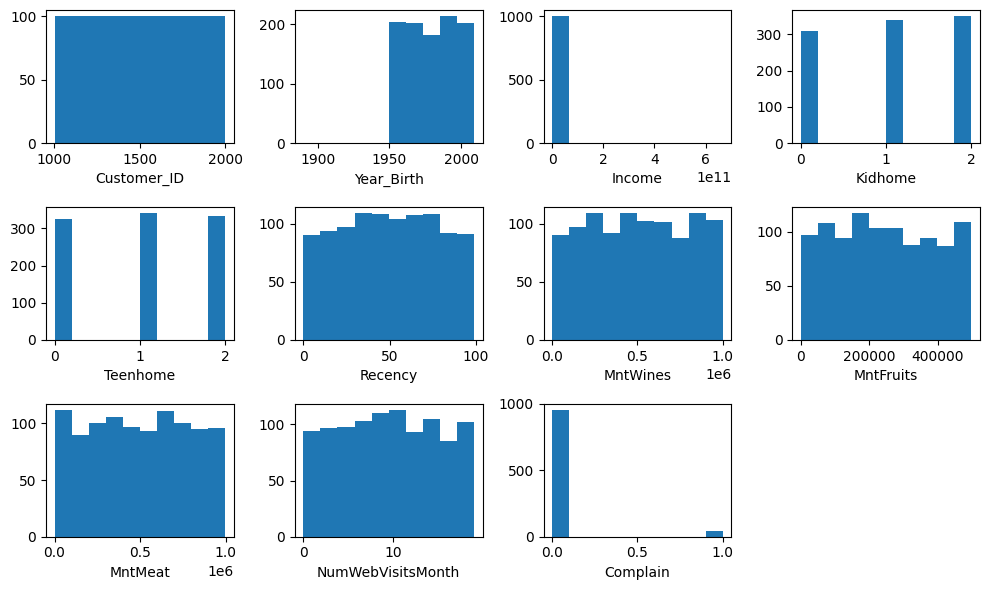

In [12]:

plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical):
    plt.subplot(3, 4, i + 1)
    plt.hist(df_raw[column])
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [13]:
df_raw = df_raw[df_raw['Income'] < 100000000000]
df_raw

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain
0,1001,1981,S2,Together,4.073491e+06,2,2,2018-01-01,83,581797,220417,208126,18,0
1,1002,1961,Basic,Married,3.984576e+06,2,1,2018-01-02,31,938485,279208,235601,14,0
2,1003,1967,Basic,Absurd,6.221782e+06,0,0,2018-01-03,86,924449,204888,928829,15,0
3,1004,1956,S1,YOLO,4.812797e+06,0,0,2018-01-04,91,29469,332981,517299,2,0
4,1005,1973,S1,Single,4.570514e+06,0,1,2018-01-05,39,284136,92703,484543,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,1957,S2,Absurd,6.140640e+06,0,1,2020-09-22,33,776004,130444,700403,6,0
996,1997,1973,SMA,YOLO,4.164390e+06,1,2,2020-09-23,34,809965,160730,951474,18,1
997,1998,1976,Basic,Divorced,6.870126e+06,0,0,2020-09-24,20,290205,251149,57830,9,0
998,1999,1964,PhD,Absurd,4.792701e+06,0,1,2020-09-25,5,649688,26257,620497,18,0


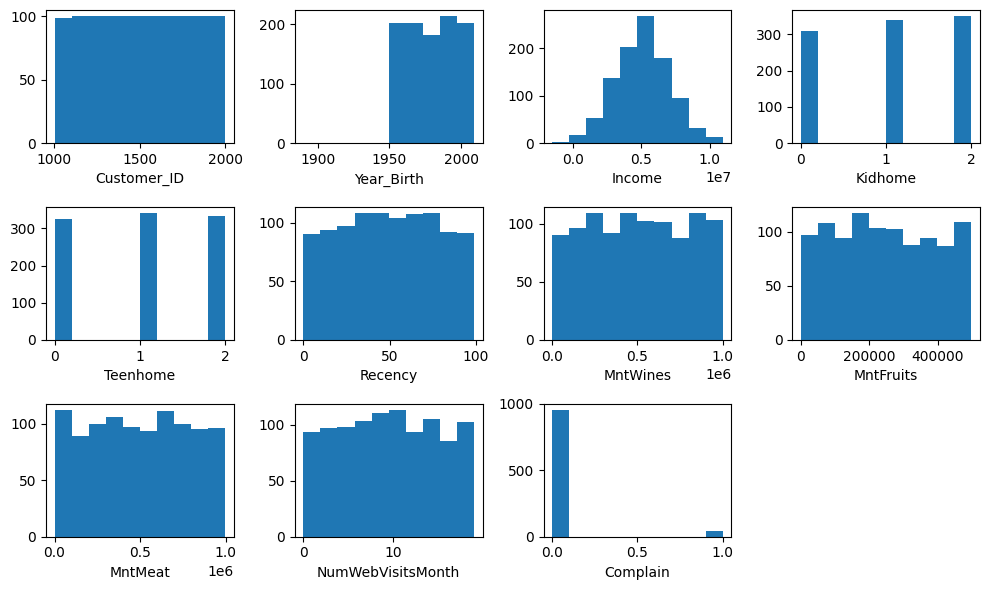

In [14]:

plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical):
    plt.subplot(3, 4, i + 1)
    plt.hist(df_raw[column])
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [15]:
df_raw = df_raw[df_raw['Year_Birth'] > 1950]
df_raw

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain
0,1001,1981,S2,Together,4.073491e+06,2,2,2018-01-01,83,581797,220417,208126,18,0
1,1002,1961,Basic,Married,3.984576e+06,2,1,2018-01-02,31,938485,279208,235601,14,0
2,1003,1967,Basic,Absurd,6.221782e+06,0,0,2018-01-03,86,924449,204888,928829,15,0
3,1004,1956,S1,YOLO,4.812797e+06,0,0,2018-01-04,91,29469,332981,517299,2,0
4,1005,1973,S1,Single,4.570514e+06,0,1,2018-01-05,39,284136,92703,484543,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,1957,S2,Absurd,6.140640e+06,0,1,2020-09-22,33,776004,130444,700403,6,0
996,1997,1973,SMA,YOLO,4.164390e+06,1,2,2020-09-23,34,809965,160730,951474,18,1
997,1998,1976,Basic,Divorced,6.870126e+06,0,0,2020-09-24,20,290205,251149,57830,9,0
998,1999,1964,PhD,Absurd,4.792701e+06,0,1,2020-09-25,5,649688,26257,620497,18,0


In [16]:
df_raw['Marital_Status'].value_counts()

Marital_Status
Single      195
YOLO        165
Together    163
Married     161
Divorced    158
Absurd      144
Name: count, dtype: int64

In [17]:
df_raw['Marital_Status'] = df_raw['Marital_Status'].replace({
    'YOLO' : 'Single',
    'Absurd' : 'Single'
})

/tmp/ipykernel_6325/3997371546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Marital_Status'] = df_raw['Marital_Status'].replace({


In [18]:
df_raw

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain
0,1001,1981,S2,Together,4.073491e+06,2,2,2018-01-01,83,581797,220417,208126,18,0
1,1002,1961,Basic,Married,3.984576e+06,2,1,2018-01-02,31,938485,279208,235601,14,0
2,1003,1967,Basic,Single,6.221782e+06,0,0,2018-01-03,86,924449,204888,928829,15,0
3,1004,1956,S1,Single,4.812797e+06,0,0,2018-01-04,91,29469,332981,517299,2,0
4,1005,1973,S1,Single,4.570514e+06,0,1,2018-01-05,39,284136,92703,484543,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,1957,S2,Single,6.140640e+06,0,1,2020-09-22,33,776004,130444,700403,6,0
996,1997,1973,SMA,Single,4.164390e+06,1,2,2020-09-23,34,809965,160730,951474,18,1
997,1998,1976,Basic,Divorced,6.870126e+06,0,0,2020-09-24,20,290205,251149,57830,9,0
998,1999,1964,PhD,Single,4.792701e+06,0,1,2020-09-25,5,649688,26257,620497,18,0


In [19]:
df_raw['Education'].value_counts()

Education
S2       408
Basic    151
S1       151
SMA      139
PhD      137
Name: count, dtype: int64

In [20]:
df_raw[numerical] = df_raw[numerical]
df_raw

/tmp/ipykernel_6325/1584988526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw[numerical] = df_raw[numerical]


,Customer_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain
0,1001,1981,S2,Together,4.073491e+06,2,2,2018-01-01,83,581797,220417,208126,18,0
1,1002,1961,Basic,Married,3.984576e+06,2,1,2018-01-02,31,938485,279208,235601,14,0
2,1003,1967,Basic,Single,6.221782e+06,0,0,2018-01-03,86,924449,204888,928829,15,0
3,1004,1956,S1,Single,4.812797e+06,0,0,2018-01-04,91,29469,332981,517299,2,0
4,1005,1973,S1,Single,4.570514e+06,0,1,2018-01-05,39,284136,92703,484543,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,1957,S2,Single,6.140640e+06,0,1,2020-09-22,33,776004,130444,700403,6,0
996,1997,1973,SMA,Single,4.164390e+06,1,2,2020-09-23,34,809965,160730,951474,18,1
997,1998,1976,Basic,Divorced,6.870126e+06,0,0,2020-09-24,20,290205,251149,57830,9,0
998,1999,1964,PhD,Single,4.792701e+06,0,1,2020-09-25,5,649688,26257,620497,18,0


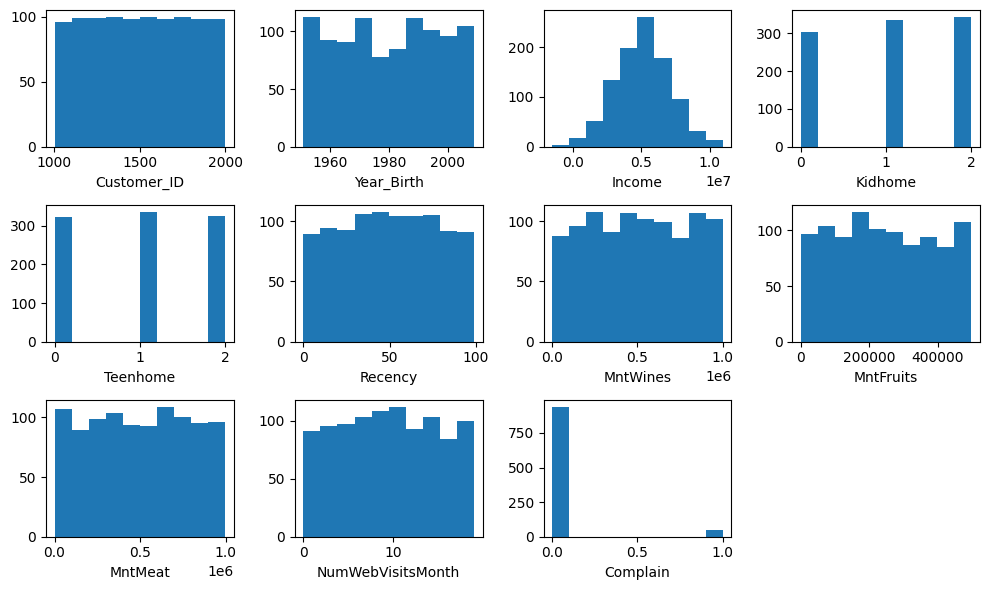

In [21]:

plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical):
    plt.subplot(3, 4, i + 1)
    plt.hist(df_raw[column])
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [22]:
df_raw['Age'] =  2025 - df_raw['Year_Birth']
df_raw['Spending_amount'] = df_raw['MntWines'] + df_raw['MntFruits'] + df_raw['MntMeat'] 
df_raw['Total_children'] = df_raw['Kidhome'] + df_raw['Teenhome']
df_raw['is_parent'] = np.where(df_raw['Total_children'] > 0, 1, 0)


df_raw.info()


<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        986 non-null    int64         
 1   Year_Birth         986 non-null    int64         
 2   Education          986 non-null    object        
 3   Marital_Status     986 non-null    object        
 4   Income             986 non-null    float64       
 5   Kidhome            986 non-null    int64         
 6   Teenhome           986 non-null    int64         
 7   Dt_Customer        986 non-null    datetime64[ns]
 8   Recency            986 non-null    int64         
 9   MntWines           986 non-null    int64         
 10  MntFruits          986 non-null    int64         
 11  MntMeat            986 non-null    int64         
 12  NumWebVisitsMonth  986 non-null    int64         
 13  Complain           986 non-null    int64         
 14  Age            

/tmp/ipykernel_6325/3394029601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Age'] =  2025 - df_raw['Year_Birth']
/tmp/ipykernel_6325/3394029601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Spending_amount'] = df_raw['MntWines'] + df_raw['MntFruits'] + df_raw['MntMeat']
/tmp/ipykernel_6325/3394029601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [23]:
df_raw.describe()

,Customer_ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain,Age,Spending_amount,Total_children,is_parent
count,986.000000,986.000000,9.860000e+02,986.000000,986.000000,986,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,9.860000e+02,986.000000,986.000000
mean,1501.199797,1980.095335,5.099085e+06,1.040568,1.003043,2019-05-16 04:47:42.474644736,49.725152,506216.052738,245776.547667,497446.169371,9.526369,0.046653,44.904665,1.249439e+06,2.043611,0.899594
min,1001.000000,1951.000000,-1.516974e+06,0.000000,0.000000,2018-01-01 00:00:00,0.000000,50.000000,307.000000,694.000000,0.000000,0.000000,16.000000,1.508210e+05,0.000000,0.000000
25%,1252.250000,1965.000000,3.791896e+06,0.000000,0.000000,2018-09-09 06:00:00,27.000000,255386.750000,128932.250000,249995.500000,5.000000,0.000000,30.000000,9.503738e+05,1.000000,1.000000
50%,1501.500000,1980.000000,5.035127e+06,1.000000,1.000000,2019-05-16 12:00:00,50.000000,502017.500000,239102.500000,498879.500000,9.000000,0.000000,45.000000,1.255262e+06,2.000000,1.000000
75%,1749.750000,1995.000000,6.390832e+06,2.000000,2.000000,2020-01-19 18:00:00,73.000000,759907.750000,370656.000000,738806.500000,14.000000,0.000000,60.000000,1.542460e+06,3.000000,1.000000
max,2000.000000,2009.000000,1.096049e+07,2.000000,2.000000,2020-09-26 00:00:00,99.000000,999952.000000,498355.000000,997498.000000,19.000000,1.000000,74.000000,2.392526e+06,4.000000,1.000000
std,287.894164,17.313269,1.977786e+06,0.811327,0.811711,NaN,27.875257,287028.876575,143610.979099,286698.993429,5.626065,0.211002,17.313269,4.281685e+05,1.146668,0.300693


In [24]:
df_raw = df_raw[df_raw['Income'] >= 0]
df_raw.describe()

,Customer_ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain,Age,Spending_amount,Total_children,is_parent
count,982.000000,982.000000,9.820000e+02,982.000000,982.000000,982,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,9.820000e+02,982.000000,982.000000
mean,1501.928717,1980.038697,5.122751e+06,1.043788,1.003055,2019-05-16 22:17:21.140529408,49.701629,505906.366599,245373.057026,496505.731161,9.528513,0.046843,44.961303,1.247785e+06,2.046843,0.900204
min,1001.000000,1951.000000,9.177937e+04,0.000000,0.000000,2018-01-01 00:00:00,0.000000,50.000000,307.000000,694.000000,0.000000,0.000000,16.000000,1.508210e+05,0.000000,0.000000
25%,1252.250000,1965.000000,3.834627e+06,0.000000,0.000000,2018-09-09 06:00:00,27.000000,255386.750000,128932.250000,249995.500000,5.000000,0.000000,30.000000,9.503738e+05,1.000000,1.000000
50%,1503.500000,1980.000000,5.035127e+06,1.000000,1.000000,2019-05-18 12:00:00,50.000000,501174.500000,238740.500000,498017.000000,9.500000,0.000000,45.000000,1.252760e+06,2.000000,1.000000
75%,1750.750000,1995.000000,6.396490e+06,2.000000,2.000000,2020-01-20 18:00:00,73.000000,759371.750000,370170.750000,736942.750000,14.000000,0.000000,60.000000,1.538872e+06,3.000000,1.000000
max,2000.000000,2009.000000,1.096049e+07,2.000000,2.000000,2020-09-26 00:00:00,99.000000,999952.000000,498355.000000,997498.000000,19.000000,1.000000,74.000000,2.392526e+06,4.000000,1.000000
std,288.166107,17.316580,1.946385e+06,0.810933,0.810853,NaN,27.862733,286879.927415,143439.224421,286300.117737,5.632538,0.211411,17.316580,4.256631e+05,1.146659,0.299881


In [25]:
df_raw

,Customer_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeat,NumWebVisitsMonth,Complain,Age,Spending_amount,Total_children,is_parent
0,1001,1981,S2,Together,4.073491e+06,2,2,2018-01-01,83,581797,220417,208126,18,0,44,1010340,4,1
1,1002,1961,Basic,Married,3.984576e+06,2,1,2018-01-02,31,938485,279208,235601,14,0,64,1453294,3,1
2,1003,1967,Basic,Single,6.221782e+06,0,0,2018-01-03,86,924449,204888,928829,15,0,58,2058166,0,0
3,1004,1956,S1,Single,4.812797e+06,0,0,2018-01-04,91,29469,332981,517299,2,0,69,879749,0,0
4,1005,1973,S1,Single,4.570514e+06,0,1,2018-01-05,39,284136,92703,484543,11,0,52,861382,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,1957,S2,Single,6.140640e+06,0,1,2020-09-22,33,776004,130444,700403,6,0,68,1606851,1,1
996,1997,1973,SMA,Single,4.164390e+06,1,2,2020-09-23,34,809965,160730,951474,18,1,52,1922169,3,1
997,1998,1976,Basic,Divorced,6.870126e+06,0,0,2020-09-24,20,290205,251149,57830,9,0,49,599184,0,0
998,1999,1964,PhD,Single,4.792701e+06,0,1,2020-09-25,5,649688,26257,620497,18,0,61,1296442,1,1


In [26]:
numerical = df_raw.select_dtypes('number').columns
numerical

Index(['Customer_ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeat', 'NumWebVisitsMonth', 'Complain',
       'Age', 'Spending_amount', 'Total_children', 'is_parent'],
      dtype='object')

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

fitur = ['Recency', 'Age', 'Spending_amount', 'Income']
x_scaled = scaler.fit_transform(df_raw[fitur])

x_scaled

array([[ 1.19569527, -0.05554176, -0.55810844, -0.5393562 ],
       [-0.67154787,  1.10000922,  0.483043  , -0.58506143],
       [ 1.30342084,  0.75334393,  1.90477833,  0.56494028],
       ...,
       [-1.06654161,  0.23334599, -1.52451953,  0.8982115 ],
       [-1.60516944,  0.92667658,  0.1143666 , -0.16965713],
       [ 0.11843962,  0.52223373,  0.56239027,  0.78727768]],
      shape=(982, 4))

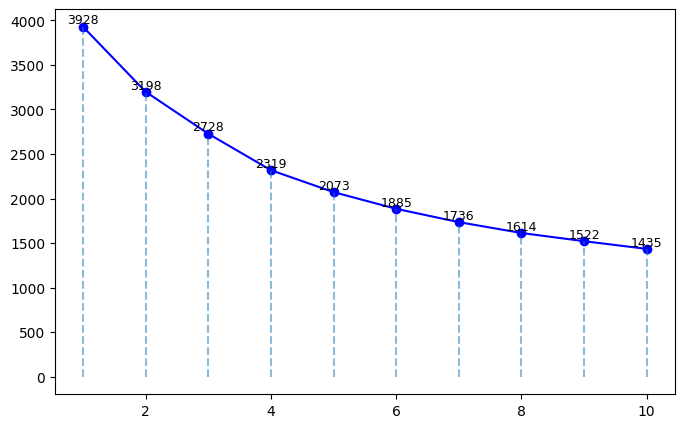

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o', label='Inertia', color='blue')

for k, val in zip(range_k, inertia):
    plt.vlines(k, ymin=0, ymax=val, linestyles='--', alpha=0.5)
    plt.text(k, val, f'{val:.0f}', ha='center', va='bottom', fontsize=9)
